In [3]:
import pandas as pd
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'],'Max Speed': [380., 370., 24., 26.]})
a = df.copy()

In [4]:
sc = "Animal"
f"{sc}_size"

&#39;Animal_size&#39;

In [5]:
class_size = df.groupby(sc).size()
class_size

Animal
Falcon    2
Parrot    2
dtype: int64

In [6]:
a[f"{sc}_size"] = df[sc].map(class_size)

In [7]:
import numpy as np
df = pd.DataFrame({
    'col1': ['A', 'B', 'A', np.nan, 'D', 'C'],
    'col2': [2, 1, 2, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})

In [8]:
df.sort_values(by=['col2', 'col1'])

col1  col2  col3 col4
1    B     1     1    B
0    A     2     0    a
2    A     2     9    c
5    C     4     3    F
4    D     7     2    e
3  NaN     8     4    D

In [1]:
# testing the new plot_matrix.py I wrote
# create some fake data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plot_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

N = 50
data = np.random.randint(5,size=(N,N))
meta = pd.DataFrame({
    'hemisphere': np.random.randint(2, size=N),
    'dVNC': np.random.randint(2, size=N),
    'ID': np.random.randint(10, size=N)
})

In [2]:
data

array([[4, 0, 1, ..., 2, 2, 0],
       [3, 2, 2, ..., 0, 2, 0],
       [2, 3, 2, ..., 0, 0, 1],
       ...,
       [4, 2, 3, ..., 2, 2, 3],
       [4, 0, 0, ..., 3, 0, 3],
       [3, 0, 4, ..., 3, 1, 1]])

(&lt;AxesSubplot:xlabel=&#39;dVNC&#39;, ylabel=&#39;dVNC&#39;&gt;,
 &lt;mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fc380651790&gt;,
 &lt;AxesSubplot:xlabel=&#39;dVNC&#39;, ylabel=&#39;dVNC&#39;&gt;,
 &lt;AxesSubplot:xlabel=&#39;dVNC&#39;, ylabel=&#39;dVNC&#39;&gt;)

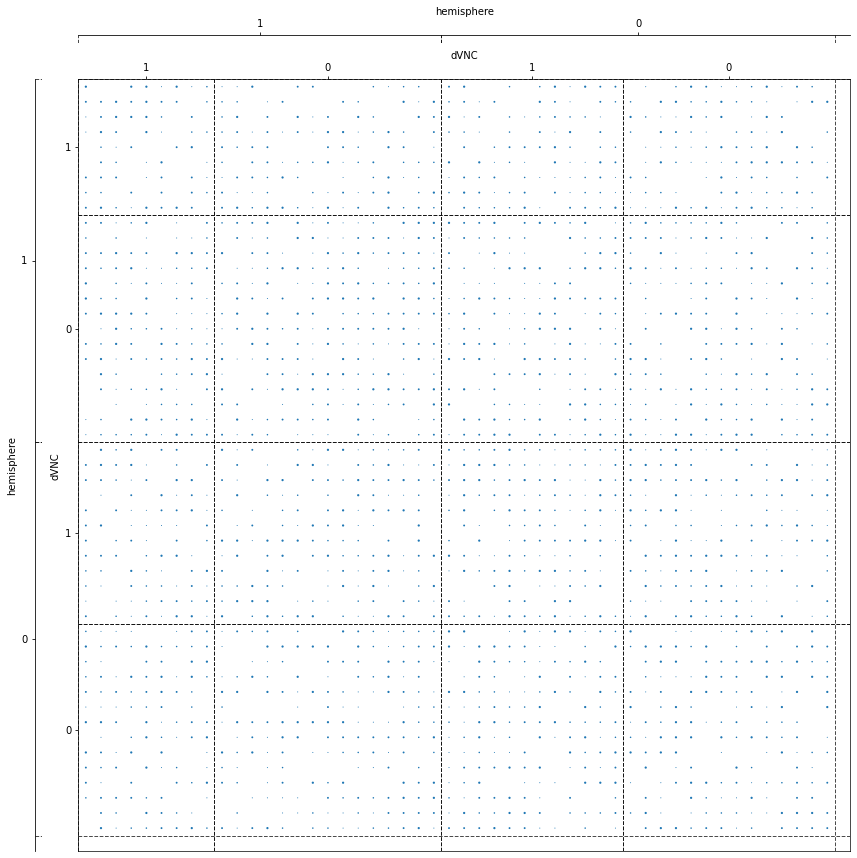

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plot_matrix.matrixplot(
    data=data,
    ax=ax,
    meta=meta,
    plot_type='scattermap',
    group_class=['hemisphere', 'dVNC'],
    item_order=['ID'],
    sizes=(1, 5)
)

Text(0.5, 1.0, &#39;Plotting a matrix in a scatterplot&#39;)

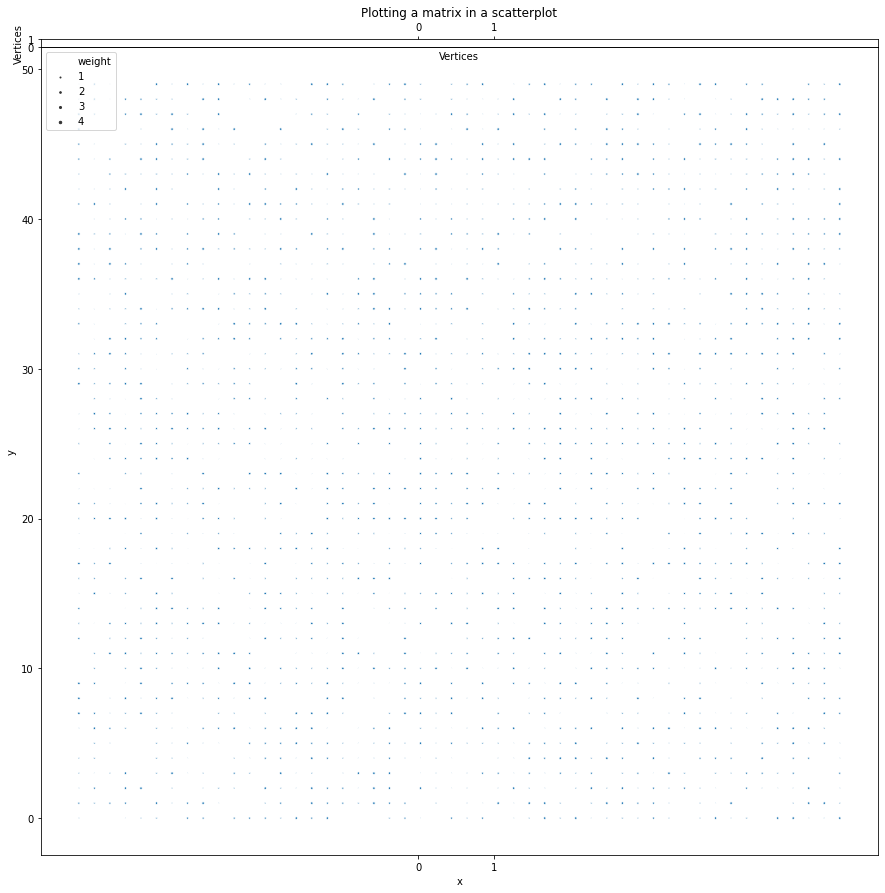

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
n_verts = data.shape[0]
inds = np.nonzero(data)
edges = data[inds]
scatter_df = pd.DataFrame()
scatter_df["weight"] = edges
scatter_df["x"] = inds[1]
scatter_df["y"] = inds[0]
sns.scatterplot(
    data=scatter_df,
    x="x",
    y="y",
    size="weight",
    sizes=(1, 6),
    ax=ax,
)

col_meta = meta
col_inds, col_meta = plot_matrix.sort_meta(
    data.shape[1],
    col_meta,
    ["hemisphere"],
    class_order="size",
    item_order=["ID"],
)
divider = make_axes_locatable(ax)
tick_ax = divider.append_axes("top", size="1%", pad=0, sharex=ax)
plot_matrix.draw_ticks(
    tick_ax,
    ax_type="x",
    meta=col_meta,
    group_class=['hemisphere'],
)
plt.xlabel("Vertices")
plt.ylabel("Vertices")
plt.title("Plotting a matrix in a scatterplot")

In [15]:
scatter_df.head()

weight  x  y
0       2  1  0
1       1  3  0
2       4  4  0
3       1  6  0
4       4  8  0

&lt;AxesSubplot:xlabel=&#39;Vertices&#39;, ylabel=&#39;Vertices&#39;&gt;

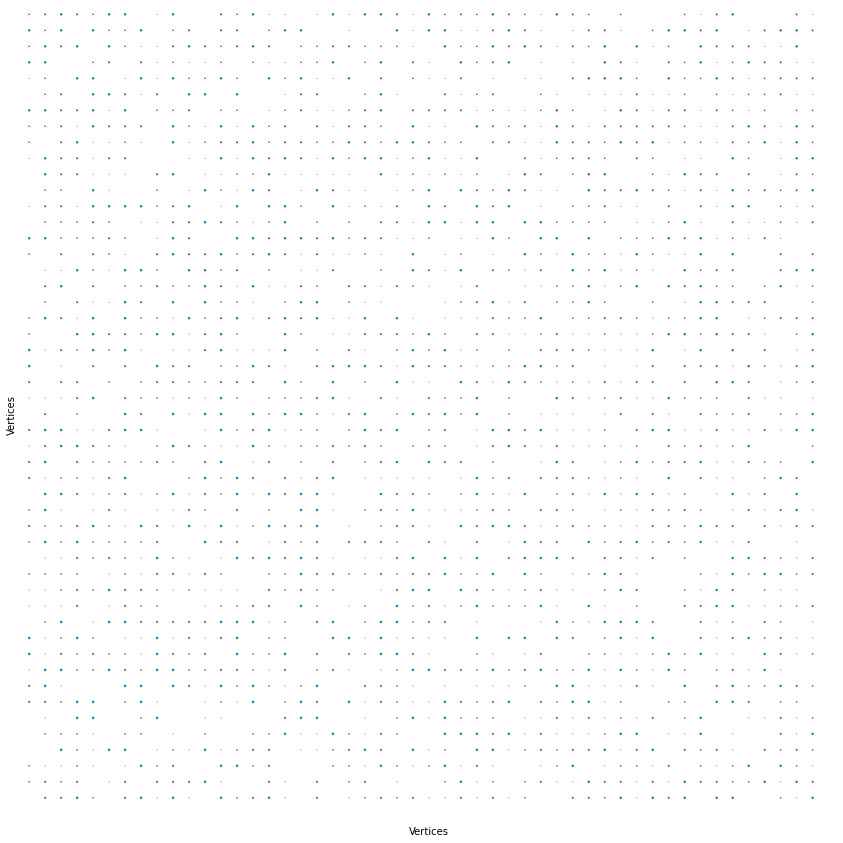

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
matrixplot(data, ax=ax, plot_type='scattermap', sizes=(1,6), border=False)